In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pygrid import grid_kernel, pygrid
from gen_phantom import gen_phantom

ERROR:  6.2101345


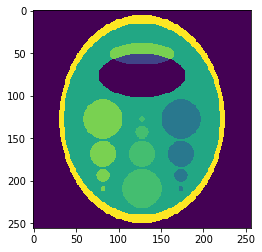

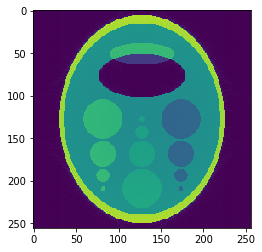

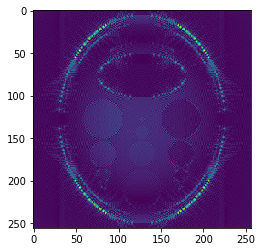

In [3]:
N_proj = 1024
gg = pygrid.Gridder(kernel_type='kb', over_samp=1.5, krad=1.5, grid_mod = 32)

r = np.linspace(-0.5, 0.5, 1024)
kx_all = []
ky_all = []
for theta in np.linspace(0, 2*np.pi, N_proj):
    kx_all.append(np.cos(theta) * r)
    ky_all.append(-np.sin(theta) * r)
k_all = np.stack((kx_all, ky_all), axis=-1)
kx_all = np.array(kx_all)
ky_all = np.array(ky_all)
dens = np.sqrt(kx_all*kx_all + ky_all*ky_all)

im = gen_phantom.gen_phantom()
k = gg.im2k(im, traj=k_all, dens=dens)
im2 = gg.k2im(k, traj=k_all, dens=dens)

im = np.abs(im)
im2 = np.abs(im2)

im2 /= im2.mean()/im.mean()

print('ERROR: ', np.linalg.norm(im-im2))

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(im2)

plt.figure()
plt.imshow(np.abs(im2-im))

In [ ]:
plt.plot(np.abs(k[:512]))